# Exercise 5

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

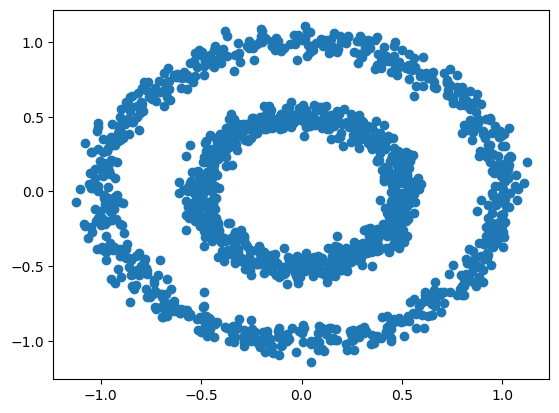

In [10]:
from sklearn import datasets
n_samples = 1500
data = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)[0]
plt.scatter(data[:,0], data[:,1])
plt.show()

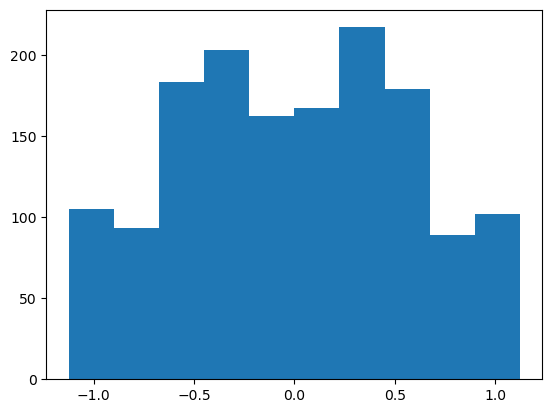

In [11]:
plt.hist(data[:,0])
plt.show()

# Exercise 6

In [22]:
from sklearn.cluster import KMeans

In [14]:
ideal_k = []
for i in range(1,21):
    est_kmeans = KMeans(n_clusters=i)
    est_kmeans.fit(data)
    
    ideal_k.append([i, est_kmeans.inertia_])
ideal_k    

[[1, 948.2622858535158],
 [2, 600.7329942634092],
 [3, 362.1627690659951],
 [4, 255.78804489178418],
 [5, 200.8629650165917],
 [6, 169.06855782180497],
 [7, 149.9061410972711],
 [8, 133.87758461124244],
 [9, 117.81768535535036],
 [10, 103.2479953262734],
 [11, 88.0261256738227],
 [12, 76.42713053623659],
 [13, 65.14729818635905],
 [14, 56.97168348612233],
 [15, 49.41603983525876],
 [16, 43.60634079211883],
 [17, 39.40000915125525],
 [18, 35.87268818972273],
 [19, 32.48523814349726],
 [20, 29.546518747240192]]

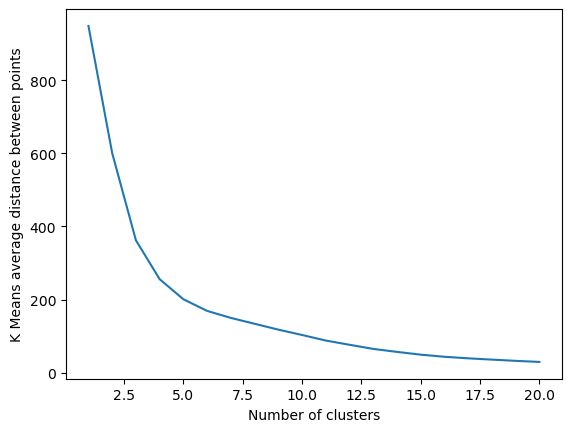

In [19]:
ideal_k = np.array(ideal_k)
plt.plot(ideal_k[:,0],ideal_k[:,1])
plt.xlabel('Number of clusters')
plt.ylabel('K Means average distance between points')
plt.show()

In [29]:
est_kmeans = KMeans(n_clusters=5)
est_kmeans.fit(data)
pred_kmeans = est_kmeans.predict(data)

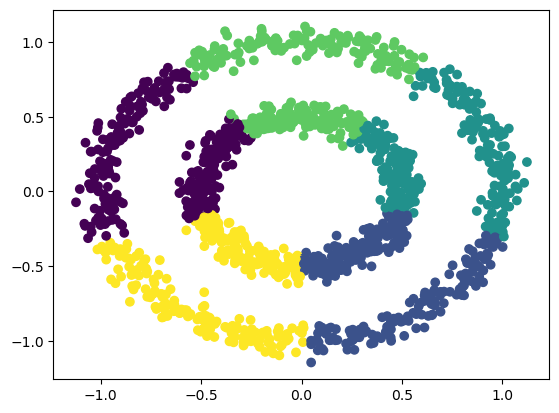

In [21]:
plt.scatter(data[:,0], data[:,1], c=pred_kmeans)
plt.show()

# Excercise 7

In [23]:
from sklearn.cluster import MeanShift

In [38]:
est_meanshift = MeanShift(bandwidth=0.5)
est_meanshift.fit(data)
pred_meanshift = est_meanshift.predict(data)

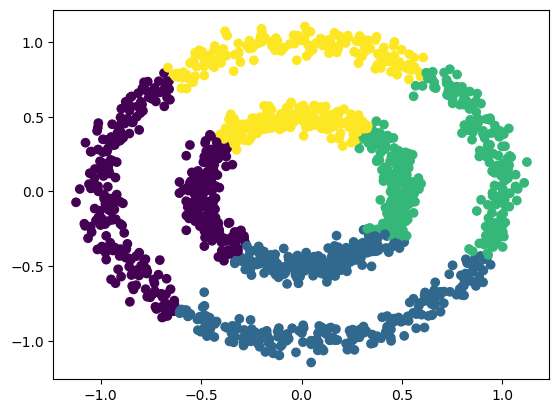

In [39]:
plt.scatter(data[:,0], data[:,1], c=pred_meanshift)
plt.show()

# Exercise 8

In [40]:
from sklearn.cluster import DBSCAN

In [57]:
est_dbscan = DBSCAN(eps=0.1)
pred_dbscan = est_dbscan.fit_predict(data)

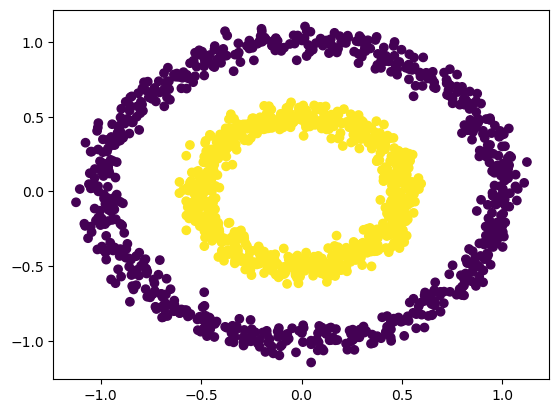

In [58]:
plt.scatter(data[:,0], data[:,1], c=pred_dbscan)
plt.show()

# Exercise 9

In [59]:
from sklearn.metrics import silhouette_score

In [64]:
kmeans_score = silhouette_score(data, pred_kmeans, metric='euclidean')
meanshift_score = silhouette_score(data, pred_meanshift, metric='euclidean')
dbscan_score = silhouette_score(data, pred_dbscan, metric='euclidean')
print(kmeans_score, meanshift_score, dbscan_score)

0.35864844795187145 0.3706820309061482 0.11178544927254296


In [66]:
from sklearn.metrics import calinski_harabasz_score

In [67]:
kmeans_score = calinski_harabasz_score(data, pred_kmeans)
meanshift_score = calinski_harabasz_score(data, pred_meanshift)
dbscan_score = calinski_harabasz_score(data, pred_dbscan)
print(kmeans_score, meanshift_score, dbscan_score)

1390.7266849471928 1298.0587900526286 0.002272474588368084
